# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
ethereum_news_articles = newsapi.get_everything(q="ethereum", language="en")

In [21]:
# Create the Bitcoin sentiment scores DataFrame

In [6]:
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos
        })
        
    except AttributeError:
        pass


In [7]:
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,text,date,Compound,Negative,Neutral,Positive
0,Two alleged crypto traders in Singapore appare...,2020-09-10,-0.6908,0.160,0.840,0.000
1,Image copyrightChandler GuoImage caption\r\n C...,2020-09-24,0.2500,0.000,0.935,0.065
2,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",2020-09-08,0.0000,0.000,1.000,0.000
3,A US district judge has sentenced a UK Nationa...,2020-09-22,-0.5267,0.128,0.872,0.000
4,"July 15 was, at first, just another day for Pa...",2020-09-24,0.0000,0.000,1.000,0.000


In [8]:
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.6908,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...
2,0.0000,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
3,-0.5267,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...
4,0.0000,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa..."


In [20]:
# Create the ethereum sentiment scores DataFrame

In [9]:
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos
        })
        
    except AttributeError:
        pass


In [10]:
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,text,date,Compound,Negative,Neutral,Positive
0,If you've interacted with cryptocurrencies in ...,2020-09-02,0.7506,0.0,0.791,0.209
1,TL;DR: The Complete Stock and Cryptocurrency I...,2020-09-07,0.0000,0.0,1.000,0.000
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",2020-09-18,0.0000,0.0,1.000,0.000
3,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26,0.7579,0.0,0.819,0.181
4,TLDR: With the training in the Interactive Lea...,2020-09-08,0.4019,0.0,0.924,0.076


In [11]:
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.4019,0.0,0.924,0.076,TLDR: With the training in the Interactive Lea...


In [19]:
# Describe the Bitcoin Sentiment

In [12]:
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.281175,0.014400,0.923850,0.061750
std,0.368322,0.044625,0.043245,0.041842
min,-0.690800,0.000000,0.840000,0.000000
25%,0.000000,0.000000,0.910000,0.000000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.916250,0.090000
max,0.507000,0.160000,1.000000,0.090000


In [18]:
# Describe the Ethereum Sentiment

In [13]:
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.263678,0.014722,0.908722,0.076556
std,0.285033,0.031212,0.088669,0.074676
min,0.000000,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.824500,0.000000
50%,0.226300,0.000000,0.917000,0.073000
75%,0.480725,0.000000,1.000000,0.134750
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
import string
# s = '... some string with punctuation ...'
# s = s.translate(string.punctuation)

In [17]:
# Expand the default stopwords list if necessary
content = bitcoin_news_articles['articles'][1]['content']

words = word_tokenize(content)

content

'Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]'

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    
    words = word_tokenize(re_clean)

    # Convert the words to lowercase
    
    words = [x.lower() for x in words]
    
    # Remove the punctuation
    
    exclude = set(string.punctuation)
    
    for i in range(len(words)):
        s = ''.join(ch for ch in words[i] if ch not in exclude)
        words[i] = s
    
    # Remove the stop words
    
    sw = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.lower() not in sw.union(sw)]
    
    # Lemmatize Words into root words
    
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    tokens = words
    
    return tokens

In [19]:
# Create a new tokens column for bitcoin

In [20]:
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)

In [21]:
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6908,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
2,0.0000,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
3,-0.5267,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...,"[u, district, judge, sentenced, uk, national, ..."
4,0.0000,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa...","[july, first, another, day, parag, agrawal, ch..."


In [22]:
# Create a new tokens column for ethereum

In [24]:
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)

In [25]:
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.4019,0.0,0.924,0.076,TLDR: With the training in the Interactive Lea...,"[tldr, training, interactive, learn, code, bun..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [31]:
# Generate the Bitcoin N-grams where N=2

In [30]:
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(12)

[(('satoshi', 'nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'daywelcome'), 13),
 (('daywelcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'bitcoin'), 13),
 (('bitcoin', 'today'), 13)]

In [32]:
# Generate the Ethereum N-grams where N=2

In [33]:
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(12)

[(('char', 'tldr'), 2),
 (('char', 'september'), 2),
 (('coronavirus', 'pandemic'), 2),
 (('one', 'cryptocurrency'), 2),
 (('fiat', 'backed'), 2),
 (('backed', 'stablecoins'), 2),
 (('satoshi', 'nakaboto'), 2),
 (('char', 'ethereum'), 2),
 (('decentralized', 'exchange'), 2),
 (('photo', 'illustration'), 2),
 (('imageslightrocket', 'via'), 2),
 (('via', 'getty'), 2)]

In [34]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Get the top 10 words for Bitcoin

In [35]:
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('bitcoin', 40),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('char', 20),
 ('another', 14),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13)]

In [38]:
# Get the top 10 words for Ethereum

In [37]:
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 18),
 ('cryptocurrency', 8),
 ('ethereum', 8),
 ('bitcoin', 7),
 ('used', 4),
 ('september', 3),
 ('price', 3),
 ('decentralized', 3),
 ('exchange', 3),
 ('getty', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [44]:
bitcoin_contents = []
for article in bitcoin_news_articles['articles']:
      if article['content']:
          bitcoin_contents.append(article['content'])

In [48]:
# Generate the Bitcoin word cloud

In [40]:
def process_text(corpus): 
    entire_string = ' '.join(corpus)
    return entire_string

In [46]:
bitcoin_all_content = process_text(bitcoin_contents)
ethereum_all_content = process_text(ethereum_contents)

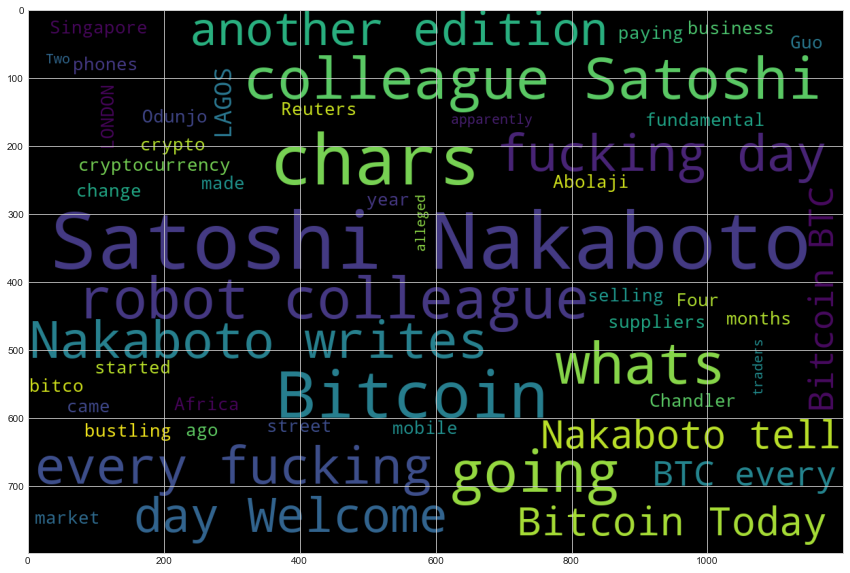

In [47]:
wc = WordCloud(width=1200, height=800, max_words=50).generate(bitcoin_all_content)
plt.imshow(wc)

In [49]:
# Generate the Ethereum word cloud

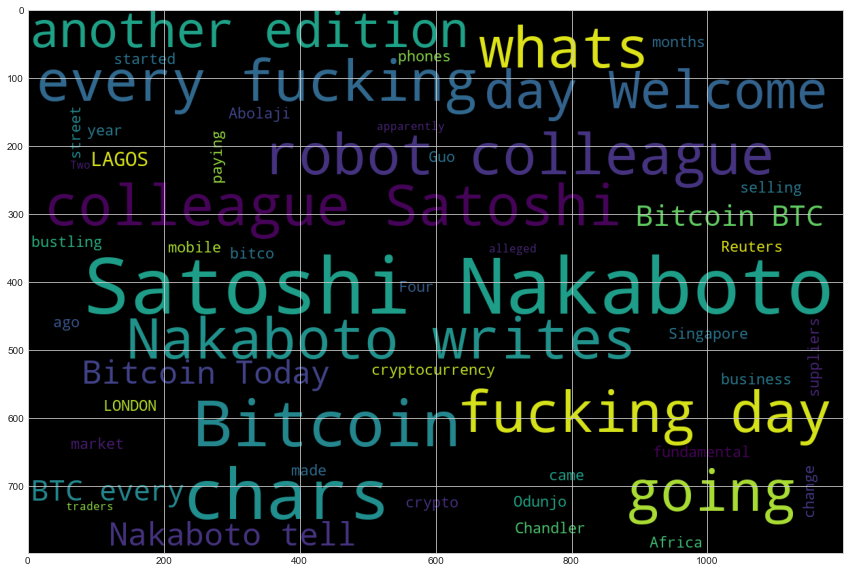

In [50]:
wc = WordCloud(width=1200, height=800, max_words=50).generate(ethereum_all_content)
plt.imshow(wc)

In [45]:
ethereum_contents = []
for article in bitcoin_news_articles['articles']:
      if article['content']:
            ethereum_contents.append(article['content'])

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [51]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [54]:
# Concatenate all of the bitcoin text together

In [53]:
bitcoin_all_content = ' '.join(bitcoin_df['text'])
bitcoin_all_content

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars] Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars] By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars] A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars] July 15 was, at first, just another day for Parag Agrawal, the chief technology officer of Twitter. Everything seemed normal on th

In [55]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_all_content)

# Add a title to the document

bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [57]:
# Render the visualization

In [56]:
displacy.render(bitcoin_doc, style='ent')

In [59]:
# List all Entities

In [60]:
for ent in bitcoin_doc.ents:
    print (ent.text, ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
US GPE
UK GPE
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
July 15 DATE
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today 

---

## Ethereum NER

In [62]:
# Concatenate all of the bitcoin text together

In [63]:
ethereum_all_content = ' '.join(ethereum_df['text'])
ethereum_all_content

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars] September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] TLDR: With the training in the Interactive Learn to Code Bundle, students tackle big coding topics through hands-on exercises 

In [64]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_all_content)

# Add a title to the document
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [66]:
# Render the visualization

In [65]:
displacy.render(ethereum_doc, style='ent')

In [67]:
# List all Entities

In [68]:
for ent in ethereum_doc.ents:
    print (ent.text, ent.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
September DATE
18 DATE
2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
LONDON GPE
Reuters ORG
about 20% PERCENT
SuperRare ORG
SuperRare ORG
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
SEC ORG
OCC ORG
fiat ORG
yesterday DATE
fiat ORG
this year DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
September 15, 2020 DATE
the night TIME
USD ORG
the night TIME
The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn